In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
training_df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
training_df.sample(3)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
15784,3100,Dota2,Positive,This is basic dope.
35792,8145,Microsoft,Positive,Our .. Jasmine works within a panel of experts...
7722,9327,Overwatch,Irrelevant,Be sure to tune in to my Brothers Stream tonig...


In [3]:
validation_df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")
validation_df.sample(3)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
889,4569,Google,Neutral,Morning Year 4! This week's English has got me...
982,3108,Dota2,Negative,wtf
852,7069,johnson&johnson,Neutral,Johnson&Johnson paused all it's trials related...


In [4]:
training_df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [5]:
training_df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# define the column names based on the dataset description
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet Text']

# load dataset
training_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None, names=column_names)
training_df.head()

,ID,Entity,Sentiment,Tweet Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
validation_df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv", header=None, names=column_names)
validation_df.sample(5)

,ID,Entity,Sentiment,Tweet Text
597,2994,Dota2,Neutral,😎 @Crystallize99 became the top of EU MMR lead...
410,12725,WorldOfCraft,Irrelevant,Oh boy I bet the responses to this in the comm...
301,6353,FIFA,Positive,This was easily the best Fifa. First time with...
866,11363,TomClancysRainbowSix,Positive,"#RainbowSixSiege where are hereford, plane, ch..."
115,5122,GrandTheftAuto(GTA),Neutral,People who killed Michael or Trevor at the end...


In [9]:
training_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,Entity,Sentiment,Tweet Text
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [10]:
training_df.isnull().sum()

ID              0
Entity          0
Sentiment       0
Tweet Text    686
dtype: int64

In [11]:
validation_df.isnull().sum()

ID            0
Entity        0
Sentiment     0
Tweet Text    0
dtype: int64

In [12]:
# imputing missing values with an empty string, as NaN (float/int) might cause TypeError

training_df['Tweet Text'].fillna('', inplace=True)
training_df.isnull().sum()

/tmp/ipykernel_13/2765371498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_df['Tweet Text'].fillna('', inplace=True)


ID            0
Entity        0
Sentiment     0
Tweet Text    0
dtype: int64

In [13]:
print("--------- Unique values in Categorical Columns: ---------")
for col in ['Sentiment', 'Entity']:
    print(f"column: {col}")
    print(training_df[col].value_counts())
    print("\n")

--------- Unique values in Categorical Columns: ---------
column: Sentiment
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


column: Entity
Entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                      

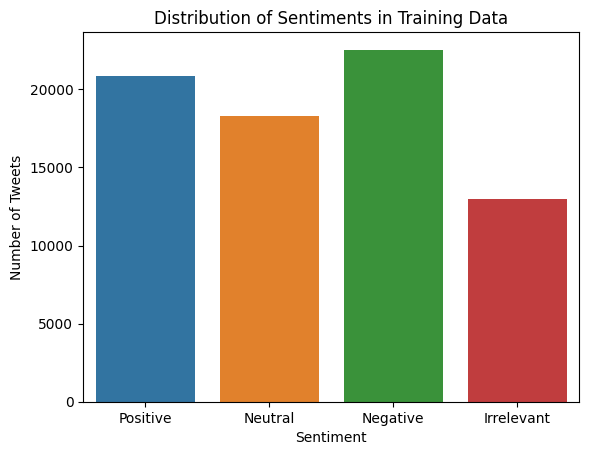

In [14]:
# Visualizations
# Sentiment Distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=training_df, x='Sentiment')
plt.title("Distribution of Sentiments in Training Data")
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [15]:
# Mapping 'Irrelevant' Sentiment to 'Neutral'
# Reason: simplifies our target classes for classification

training_df['Sentiment'] = training_df['Sentiment'].replace('Irrelevant', 'Neutral')
validation_df['Sentiment'] = validation_df['Sentiment'].replace('Irrelevant', 'Neutral')

In [16]:
# Text Preprocessing (Applying to 'Tweet Text')
# Reason: It will clean and normalize the Tweet Text, making it suitable for text analysis and ML models.

training_df['Tweet Text'].sample(30)

56090     @ Rainbow6Game I can't log in to rain on my Xbox
27790    @assassinscreed ok just break hold my heart my...
15156    Awesome cinematics, I've played this game for ...
34498              This guy has is fucking cracked holeeee
13960    Moments pass like these are why then I like 2k...
266      4 favorite games of all time. (thanks to @ 317...
12491                                          the perfect
21885                   .  Bubzjki loses teeth after dying
9537                                 THE FUCK YOU W TO ME?
73408    Fucking W, Glad a fan bought a little stock wh...
30799    @ LeagueOfLegends ya know poppy bug killing th...
28957                                       Bald HOE SHIT.
26899    My experience with ASSASSIN'S CREED: ODYSSEY. ...
63060    Lol man @EAMaddenNFL y’all screwed @ryantanneh...
67377                                             Fuck off
10931                                                   it
8115     Today has probably the most fun I’ve had watch.

In [17]:
import re

def contains_url(text):
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|bit\.ly/\S+|t\.co/\S+')
    return bool(pattern.search(str(text)))

training_df['Tweet Text'].apply(contains_url).value_counts()

Tweet Text
False    72836
True      1846
Name: count, dtype: int64

In [18]:
import emoji

def contains_emoji(text):
    text = str(text)
    return bool(emoji.emoji_count(text))

training_df['Tweet Text'].apply(contains_emoji).value_counts()

Tweet Text
False    73773
True       909
Name: count, dtype: int64

In [19]:
training_df['has_emoji'] = training_df['Tweet Text'].apply(contains_emoji)
training_df[training_df['has_emoji'] == True]['Tweet Text'].head()

78     One of our own @ProfZeroo is live w/ @borderla...
81     One of our own @ProfZeroo is live >/ @borderla...
222    I'm in this @CBP video. @DHS_Wolf deceptively ...
225    I'm in this @CBP video. Somebody deceptively c...
576    Top 4 favourite games you say? 🤔. . Sea of Thi...
Name: Tweet Text, dtype: object

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [21]:
# initializing nltk tools

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [22]:
def preprocess_tweets(text):
    text = str(text)

    # 1. Lowercasing
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|bit.ly/\S+', '', text)

    # 3. remove user mentions, @usernames
    text = re.sub(r'@\w+', '', text)

    # 4. remove hashtag symbol
    text = re.sub(r'#', '', text)

    # 5. remove punctuation and special characters (keeping letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # 6. remove emojis
    text = emoji.demojize(text)    # converts smiley face to :grinning_face_with_big_eyes:
    text = re.sub(r':\S+:', '', text)

    # 7. remove numbers
    text = re.sub(r'\d+', '', text)

    # 8. remove extra whitespace
    text = re.sub(r'\s+', '', text).strip()

    # 9. Tokenization
    tokens = word_tokenize(text)

    # 10. remove stopwords and 11. lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ''.join(cleaned_tokens)

In [23]:
training_df['Cleaned Tweet Text'] = training_df['Tweet Text'].apply(preprocess_tweets)
validation_df['Cleaned Tweet Text'] = validation_df['Tweet Text'].apply(preprocess_tweets)

training_df[['Tweet Text', 'Cleaned Tweet Text']].sample(10)

,Tweet Text,Cleaned Tweet Text
62480,Epic store closed! hahahah GTA V killed it.,epicstoreclosedhahahahgtavkilledit
13723,@ NBA2K fix my shyt wtf is y'all doing.,nbakfixmyshytwtfisyalldoing
45081,An amazing night with Mario live @davematthews...,anamazingnightwithmarioliveverizonpayitforward...
1213,"Stay tuned for next week's episode of ""Hello R...",staytunedfornextweeksepisodeofhelloredditmybos...
50042,How Cantona got a higher rating than in FIFA,howcantonagotahigherratingthaninfifa
71360,30 minutes until my latest video on PvP @ Ghos...,minutesuntilmylatestvideoonpvpghostreconalthou...
52109,Gonna be red dead redemption 2 cause orange mo...,gonnabereddeadredemptioncauseorangemorganmakes...
49127,Playing FIFA is the best than going to die in ...,playingfifaisthebestthangoingtodieinwaterass
50691,"Play Pro Clubs on Console, Playstation vs PC? ...",playproclubsonconsoleplaystationvspcdownloadth...
48148,@HomeDepot. 5 This has been the WORST biggest ...,thishasbeentheworstbiggestexperienceweveeverre...


In [24]:
from sklearn.preprocessing import OneHotEncoder

# It's crucial to fit the encoder on the *training data only* to prevent data leakage.
# Then transform both training and validation sets.

# Convert 'Entity' to a DataFrame for OneHotEncoder
train_entities = training_df[['Entity']]
val_entities = validation_df[['Entity']]

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False to get dense array

# Fit encoder on training entities and transform both training and validation
encoder.fit(train_entities)

encoded_train_entities = encoder.transform(train_entities)
encoded_val_entities = encoder.transform(val_entities)

# Create new DataFrames from the encoded entities
# Get feature names for new columns
entity_feature_names = encoder.get_feature_names_out(['Entity'])

train_entity_df = pd.DataFrame(encoded_train_entities, columns=entity_feature_names, index=training_df.index)
val_entity_df = pd.DataFrame(encoded_val_entities, columns=entity_feature_names, index=validation_df.index)

# Concatenate the one-hot encoded entity features back to the main DataFrames
training_df = pd.concat([training_df, train_entity_df], axis=1)
validation_df = pd.concat([validation_df, val_entity_df], axis=1)

print("--- Sample with One-Hot Encoded Entities (Training) ---")
# Show original Entity column and some of the new one-hot encoded columns
print(training_df[['Entity'] + list(entity_feature_names[:5])].head()) # Display first 5 new entity columns
print(f"\nNumber of One-Hot Encoded Entity features: {len(entity_feature_names)}")
print("\n" + "="*50 + "\n")

--- Sample with One-Hot Encoded Entities (Training) ---
        Entity  Entity_Amazon  Entity_ApexLegends  Entity_AssassinsCreed  \
0  Borderlands            0.0                 0.0                    0.0   
1  Borderlands            0.0                 0.0                    0.0   
2  Borderlands            0.0                 0.0                    0.0   
3  Borderlands            0.0                 0.0                    0.0   
4  Borderlands            0.0                 0.0                    0.0   

   Entity_Battlefield  Entity_Borderlands  
0                 0.0                 1.0  
1                 0.0                 1.0  
2                 0.0                 1.0  
3                 0.0                 1.0  
4                 0.0                 1.0  

Number of One-Hot Encoded Entity features: 32




In [25]:
# Feature Engineering
# Combine Text and Entity
# Concatenating the entity name with the cleaned tweet text creates a unified text field that explicitly links the entity to the sentiment. This can be very powerful for models that process a single text input.

# Concatenate 'Entity' with 'Cleaned Tweet Text'
training_df['Combined Text'] = training_df['Entity'].astype(str) + " " + training_df['Cleaned Tweet Text']
validation_df['Combined Text'] = validation_df['Entity'].astype(str) + " " + validation_df['Cleaned Tweet Text']

print("--- Sample with Combined Text (Training) ---")
print(training_df[['Entity', 'Cleaned Tweet Text', 'Combined Text']].head())
print("\n" + "="*50 + "\n")

--- Sample with Combined Text (Training) ---
        Entity                            Cleaned Tweet Text  \
0  Borderlands    imgettingonborderlandsandiwillmurderyouall   
1  Borderlands       iamcomingtothebordersandiwillkillyouall   
2  Borderlands      imgettingonborderlandsandiwillkillyouall   
3  Borderlands     imcomingonborderlandsandiwillmurderyouall   
4  Borderlands  imgettingonborderlandsandiwillmurderyoumeall   

                                       Combined Text  
0  Borderlands imgettingonborderlandsandiwillmurd...  
1  Borderlands iamcomingtothebordersandiwillkilly...  
2  Borderlands imgettingonborderlandsandiwillkill...  
3  Borderlands imcomingonborderlandsandiwillmurde...  
4  Borderlands imgettingonborderlandsandiwillmurd...  




# VISUALIZATIONS

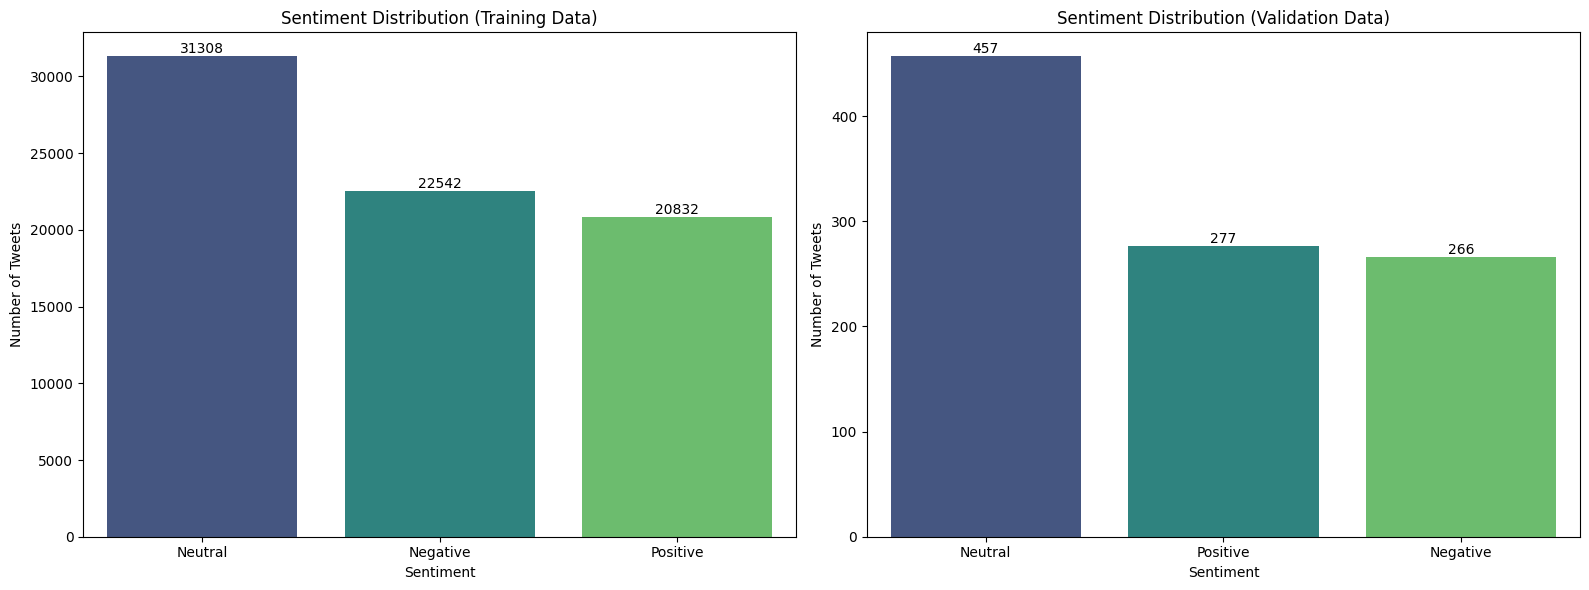

In [26]:
# 1. Sentiment Distribution (Training vs. Validation)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=training_df, x='Sentiment', palette='viridis', ax=axes[0], order=training_df['Sentiment'].value_counts().index)
axes[0].set_title('Sentiment Distribution (Training Data)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Tweets')
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.countplot(data=validation_df, x='Sentiment', palette='viridis', ax=axes[1], order=validation_df['Sentiment'].value_counts().index)
axes[1].set_title('Sentiment Distribution (Validation Data)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Tweets')
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

**Observations: Sentiments are relatively balanced in both sets after mapping 'Irrelevant' to 'Neutral'.**



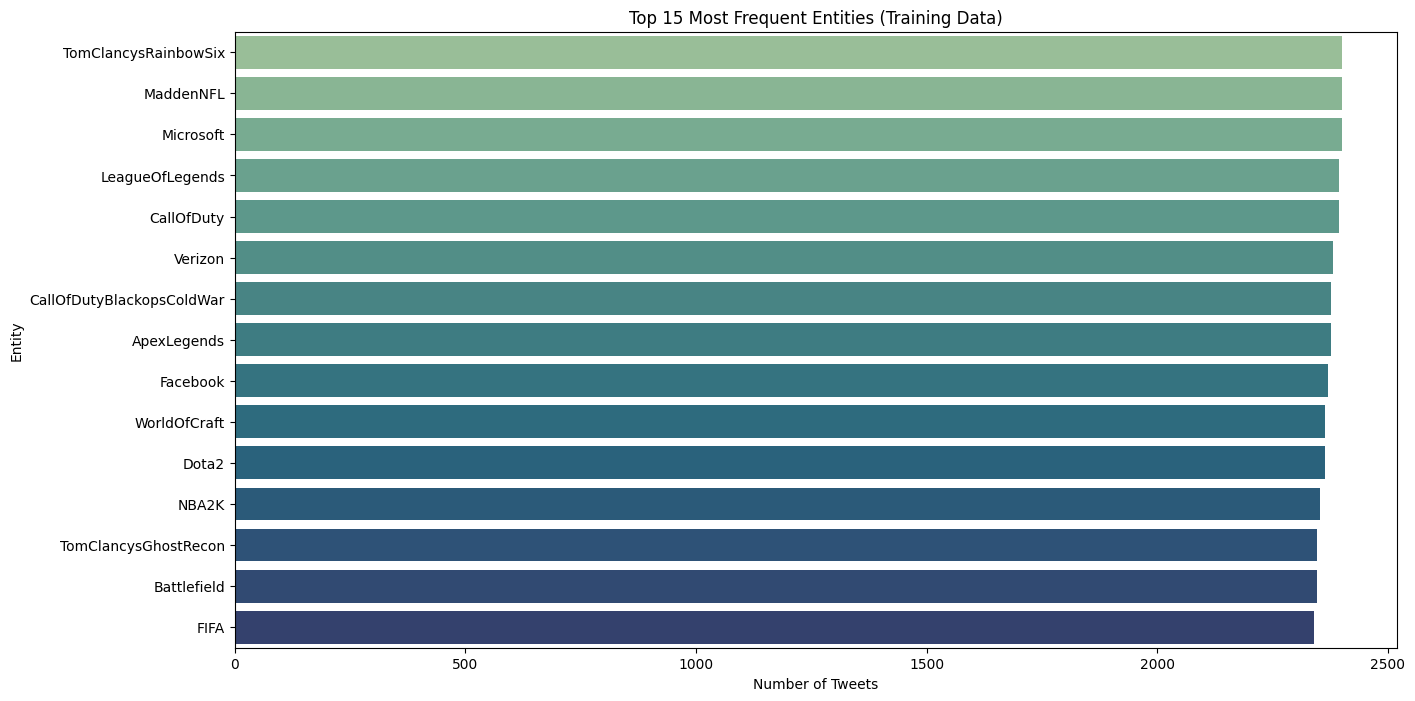

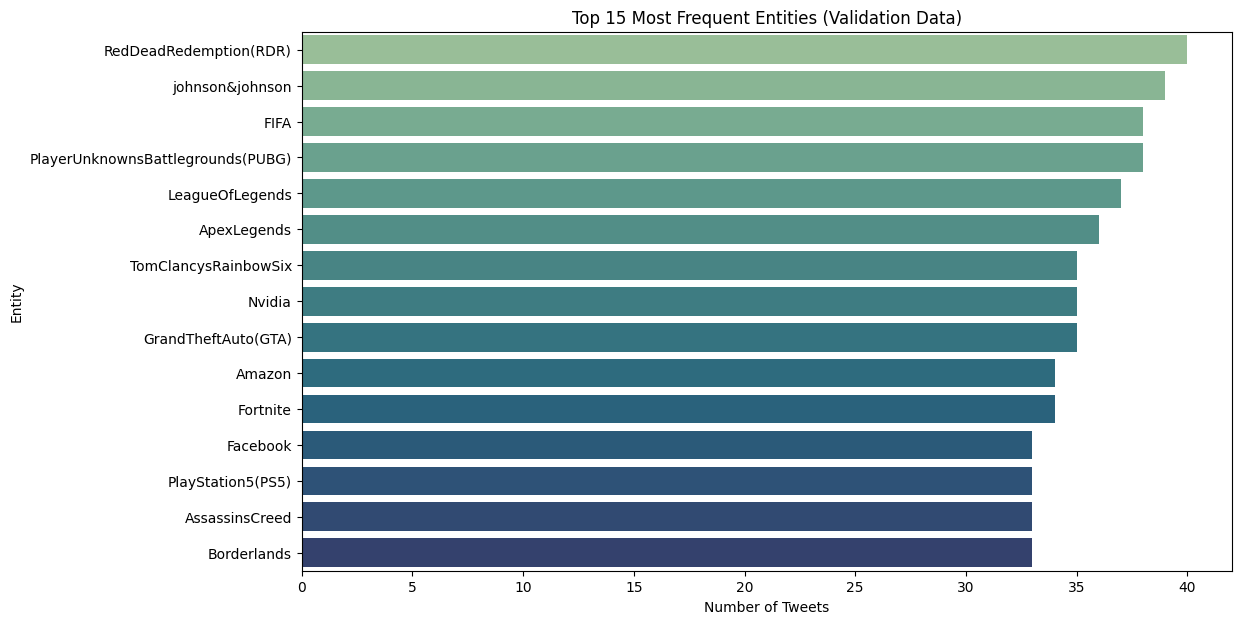

In [27]:
# 2. Top N Entities (Training vs. Validation)
plt.figure(figsize=(15, 8))
sns.barplot(x=training_df['Entity'].value_counts().head(15).values,
            y=training_df['Entity'].value_counts().head(15).index,
            palette='crest')
plt.title('Top 15 Most Frequent Entities (Training Data)')
plt.xlabel('Number of Tweets')
plt.ylabel('Entity')
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x=validation_df['Entity'].value_counts().head(15).values,
            y=validation_df['Entity'].value_counts().head(15).index,
            palette='crest')
plt.title('Top 15 Most Frequent Entities (Validation Data)')
plt.xlabel('Number of Tweets')
plt.ylabel('Entity')
plt.show()

**Observations: Reveals the most discussed brands/topics. Many are gaming-related.**

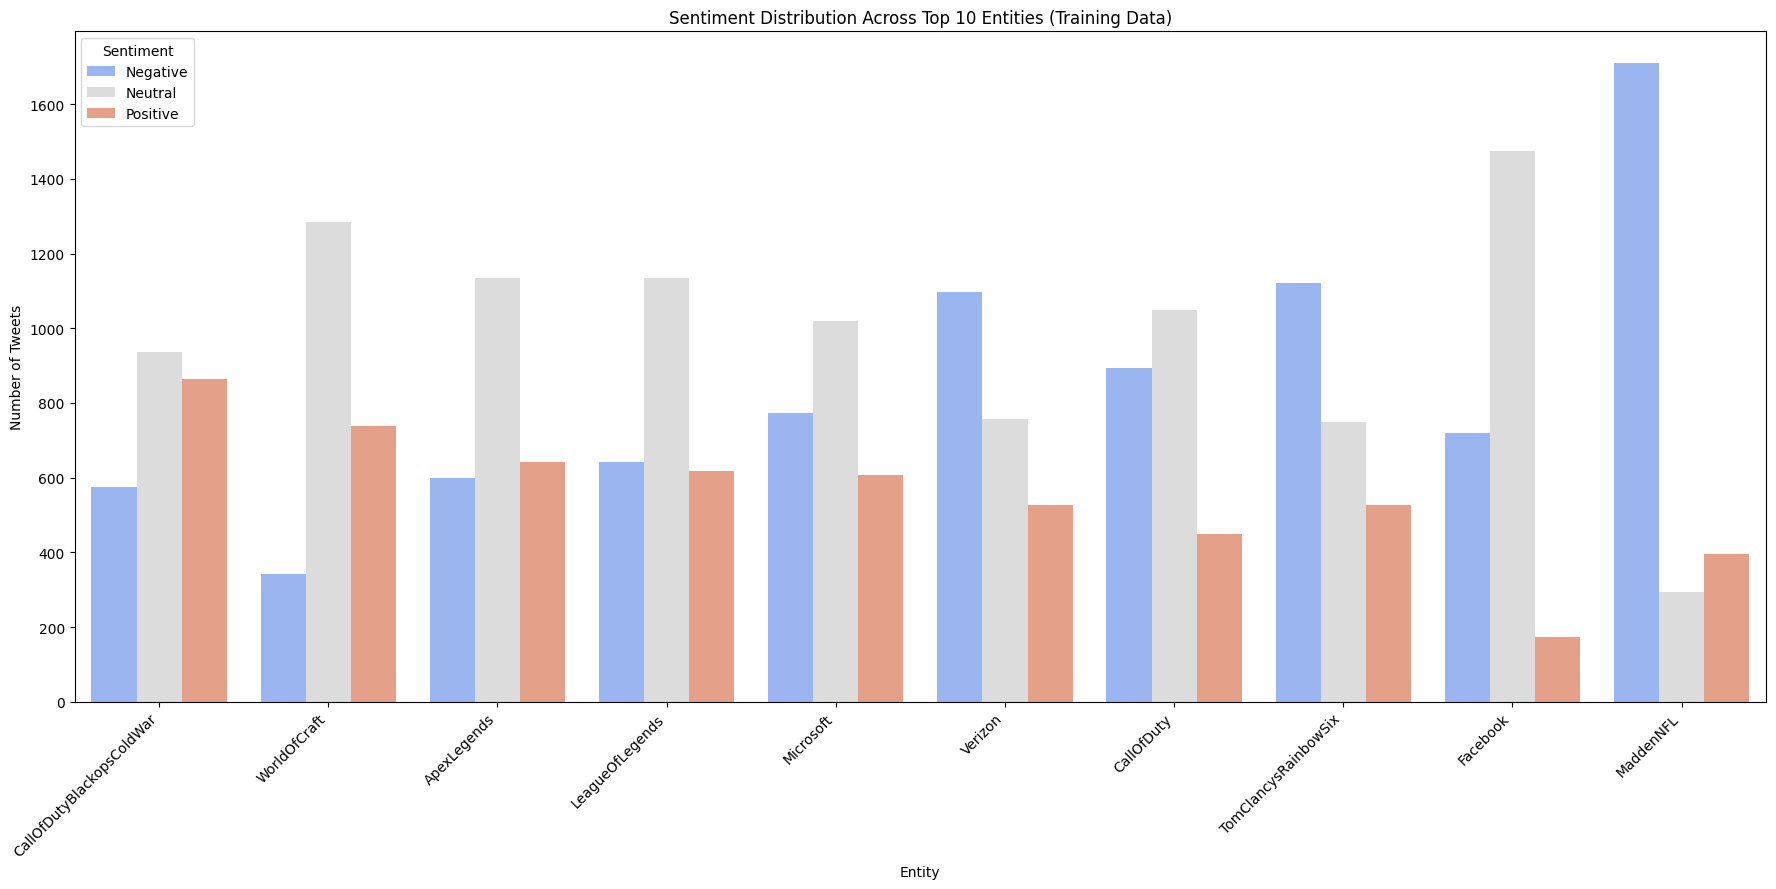

In [28]:
# 3. Sentiment Distribution per Entity (for top N entities in training)
top_n_entities = training_df['Entity'].value_counts().head(10).index.tolist()
filtered_df = training_df[training_df['Entity'].isin(top_n_entities)]

plt.figure(figsize=(18, 9))
sns.countplot(data=filtered_df, x='Entity', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution Across Top 10 Entities (Training Data)')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

**Observations: Shows how sentiment varies for popular entities. Some entities might lean more negative (e.g., game issues) while others might be more positive (e.g., product launch excitement).**

# Modeling

In [29]:
# Scikit-learn for text vectorization and traditional ML models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [30]:
# Preparing Labels (Target Variable)
# Map sentiment strings to numerical labels

sentiment_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}    # assigning integer labels
training_df['Sentiment_Encoded'] = training_df['Sentiment'].map(sentiment_mapping)
validation_df['Sentiment_Encoded'] = validation_df['Sentiment'].map(sentiment_mapping)

X_train_text = training_df['Combined Text']
y_train = training_df['Sentiment_Encoded']

X_val_text = validation_df['Combined Text']
y_val = validation_df['Sentiment_Encoded']

num_classes = len(sentiment_mapping)

In [31]:
print("Data preparation for modeling  complete.\n")
print(f"Number of classes: {num_classes}")
print(f"Training data shape: {X_train_text.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val_text.shape}, {y_val.shape}")

Data preparation for modeling  complete.

Number of classes: 3
Training data shape: (74682,), (74682,)
Validation data shape: (1000,), (1000,)


### 1. TF-IDF with Support Vector Machine (SVM)

In [32]:
# Initialize TF-IDF vectorizer
# max_features: limit the number of features (vocabulary size)
# ngram_range: consider single words (1, 1) or pairs of words (1, 2) or more

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))


# fit TF-IDF on training data and transform both training and validation data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_val_tfidf = tfidf_vectorizer.transform(X_val_text)

print(f"TF-IDF features shape (Training): {X_train_tfidf.shape}")
print(f"TF-IDF features shape (Validation): {X_val_tfidf.shape}")

TF-IDF features shape (Training): (74682, 10000)
TF-IDF features shape (Validation): (1000, 10000)


In [33]:
# Initialize and train Logistic Regression Model

log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42) # liblinear is good for small datasets and L1/L2 regularization
log_reg_model.fit(X_train_tfidf, y_train)

# predicting on validation set
y_pred_log_reg = log_reg_model.predict(X_val_tfidf)

# Evaluating Logistic Regression
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
print(f"\nLogistic Regression Accuracy: {accuracy_log_reg: .4f}")
print(f"\nClassification Report (Logistic Regression):\n", classification_report(y_val, y_pred_log_reg, target_names=sentiment_mapping.keys()))


Logistic Regression Accuracy:  0.6090

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

    Positive       0.74      0.40      0.52       277
    Negative       0.58      0.47      0.52       266
     Neutral       0.59      0.82      0.68       457

    accuracy                           0.61      1000
   macro avg       0.64      0.56      0.57      1000
weighted avg       0.63      0.61      0.59      1000



In [34]:
# TF-IDF with Support Vector Machine (SVM)

# Initializing and training SVM model
# SVC with 'linear' kernel is often good for text classification
# C: regularization parameter (smaller values -> stronger regularization)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)

accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm: .4f}")
print(f"\nClassification Report (SVM):\n", classification_report(y_val, y_pred_svm, target_names=sentiment_mapping.keys()))


SVM Accuracy:  0.6100

Classification Report (SVM):
               precision    recall  f1-score   support

    Positive       0.74      0.40      0.52       277
    Negative       0.58      0.47      0.52       266
     Neutral       0.59      0.82      0.69       457

    accuracy                           0.61      1000
   macro avg       0.64      0.56      0.57      1000
weighted avg       0.63      0.61      0.60      1000



In [35]:
print("------------ Model Performance Summary ------------")
print(f"Logistic Regression (TF-IDF): Accuracy = {accuracy_log_reg: .4f}")
print(f"SVM (TF-IDF)                : Accuracy = {accuracy_svm: .4f}")

print("\nNote: Accuracy is the 'Top 1 Classification Accuracy' as per problem statement")

------------ Model Performance Summary ------------
Logistic Regression (TF-IDF): Accuracy =  0.6090
SVM (TF-IDF)                : Accuracy =  0.6100

Note: Accuracy is the 'Top 1 Classification Accuracy' as per problem statement
